In [4]:
% matplotlib inline

import nltk
from nltk.tokenize import sent_tokenize
import numpy as np

import os
import sys

from textblob import TextBlob

dirs = os.listdir("/Users/azg/Desktop/kanye_lyrics")

sentiment_list = []

for file in dirs:
    filename = "/Users/azg/Desktop/kanye_lyrics/" + file
    lyrics_text = open(filename).read()
    token_lyrics = sent_tokenize(lyrics_text)[0]
    lyrics_blob = TextBlob(token_lyrics)
    sentiment_list.append(lyrics_blob.sentiment)

lyric_polarity = []
lyric_subjectivity = []

for sentiment in sentiment_list:
    lyric_polarity.append(sentiment[0])
    lyric_subjectivity.append(sentiment[1])

album_polarity = [np.mean(lyric_polarity[:14]),
              np.mean(lyric_polarity[14:29]),
              np.mean(lyric_polarity[29:42]),
              np.mean(lyric_polarity[42:53]),
              np.mean(lyric_polarity[53:64]),
              np.mean(lyric_polarity[64:74]),
              np.mean(lyric_polarity[74:])]

album_subjectivity = [np.mean(lyric_subjectivity[:14]),
                     np.mean(lyric_subjectivity[14:29]),
                     np.mean(lyric_subjectivity[29:42]),
                     np.mean(lyric_subjectivity[42:53]),
                     np.mean(lyric_subjectivity[53:64]),
                     np.mean(lyric_subjectivity[64:74]),
                     np.mean(lyric_subjectivity[74:])]

import matplotlib.pyplot as plt

x_points = [x+1 for x in range(len(lyric_polarity))]

plt.figure(figsize=(10,10))
plt.plot(x_points,lyric_polarity, color='k')
plt.plot(x_points,lyric_subjectivity, color='g')

album_points = [x+1 for x in range(len(album_polarity))]

plt.figure(figsize=(10,10))
plt.plot(album_points, album_polarity, color='k')
plt.plot(album_points, album_subjectivity, color='g')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte

In [2]:
import pandas as pd

nrc_lex = pd.read_csv("/Users/azg/Desktop/NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt")

nrc_lex.head()

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [3]:
import nltk
from nltk.tokenize import sent_tokenize

import os
import sys

from textblob import TextBlob

from nltk.tokenize import TreebankWordTokenizer

# anger, fear, anticipation, trust, surprise, sadness, joy, and disgust

kanye_anger_score = []
kanye_fear_score = []
kanye_anticipation_score = []
kanye_trust_score = []
kanye_surprise_score = []
kanye_sadness_score = []
kanye_joy_score = []
kanye_disgust_score = []

for file in dirs:
    filename = "/Users/azg/Desktop/kanye_lyrics/" + file
    lyrics_text = open(filename).read()
    token_lyrics = sent_tokenize(lyrics_text)[0]
    lyric_words = TreebankWordTokenizer().tokenize(token_lyrics)
    anger = 0
    fear = 0
    anticipation = 0
    trust = 0
    surprise = 0
    sadness = 0
    joy = 0
    disgust = 0
    for word in lyric_words:
        anger_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='anger'].index.tolist()
        if len(anger_list) == 1:
            anger += int(nrc_lex.iloc[int(anger_list[0])]['association'])
        fear_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='fear'].index.tolist()
        if len(fear_list) == 1:
            fear += int(nrc_lex.iloc[int(fear_list[0])]['association'])
        anticipation_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='anticipation'].index.tolist()
        if len(anticipation_list) == 1:
            anticipation += int(nrc_lex.iloc[int(anticipation_list[0])]['association'])
        trust_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='trust'].index.tolist()
        if len(trust_list) == 1:
            trust += int(nrc_lex.iloc[int(trust_list[0])]['association'])
        surprise_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='surprise'].index.tolist()
        if len(surprise_list) == 1:
            surprise += int(nrc_lex.iloc[int(surprise_list[0])]['association'])
        sadness_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='sadness'].index.tolist()
        if len(sadness_list) == 1:
            sadness += int(nrc_lex.iloc[int(sadness_list[0])]['association'])
        joy_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='joy'].index.tolist()
        if len(joy_list) == 1:
            joy += int(nrc_lex.iloc[int(joy_list[0])]['association'])
        disgust_list = nrc_lex[nrc_lex['word']==word][nrc_lex['emotion']=='disgust'].index.tolist()
        if len(disgust_list) == 1:
            disgust += int(nrc_lex.iloc[int(disgust_list[0])]['association'])
    kanye_anger_score.append((anger/len(lyric_words)))
    kanye_fear_score.append((fear/len(lyric_words)))
    kanye_anticipation_score.append((anticipation/len(lyric_words)))
    kanye_trust_score.append((trust/len(lyric_words)))
    kanye_surprise_score.append((surprise/len(lyric_words)))
    kanye_sadness_score.append((sadness/len(lyric_words)))
    kanye_joy_score.append((joy/len(lyric_words)))
    kanye_disgust_score.append((disgust/len(lyric_words)))


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte

In [ ]:
import matplotlib.pyplot as plt

kanye_points = [x+1 for x in range(len(dirs))]

plt.figure(figsize=(100,40))
plt.plot(kanye_points,kanye_anger_score)
plt.plot(kanye_points,kanye_fear_score)
plt.plot(kanye_points,kanye_anticipation_score)
plt.plot(kanye_points,kanye_trust_score)
plt.plot(kanye_points,kanye_surprise_score)
plt.plot(kanye_points,kanye_sadness_score)
plt.plot(kanye_points,kanye_joy_score)
plt.plot(kanye_points,kanye_disgust_score, 'b--')
plt.legend(['Anger', 'Fear', 'Anticipation', 
            'Trust', 'Surprise', 'Sadness', 
            'Joy', 'Disgust'], loc='upper left')
plt.xticks(np.arange(0, len(kanye_points), 1.0))

In [206]:
# print(kanye_anger_score)
# print(kanye_fear_score)
# print(kanye_anticipation_score)
# print(kanye_trust_score)
# print(kanye_surprise_score)
# print(kanye_sadness_score)
# print(kanye_joy_score)
# print(kanye_disgust_score)

album_anger = [np.mean(kanye_anger_score[:14]),
              np.mean(kanye_anger_score[14:29]),
              np.mean(kanye_anger_score[29:42]),
              np.mean(kanye_anger_score[42:53]),
              np.mean(kanye_anger_score[53:64]),
              np.mean(kanye_anger_score[64:74]),
              np.mean(kanye_anger_score[74:])]
album_fear = [np.mean(kanye_fear_score[:14]),
              np.mean(kanye_fear_score[14:29]),
              np.mean(kanye_fear_score[29:42]),
              np.mean(kanye_fear_score[42:53]),
              np.mean(kanye_fear_score[53:64]),
              np.mean(kanye_fear_score[64:74]),
              np.mean(kanye_fear_score[74:])]
album_anticipation = [np.mean(kanye_anticipation_score[:14]),
              np.mean(kanye_anticipation_score[14:29]),
              np.mean(kanye_anticipation_score[29:42]),
              np.mean(kanye_anticipation_score[42:53]),
              np.mean(kanye_anticipation_score[53:64]),
              np.mean(kanye_anticipation_score[64:74]),
              np.mean(kanye_anticipation_score[74:])]
album_trust = [np.mean(kanye_trust_score[:14]),
              np.mean(kanye_trust_score[14:29]),
              np.mean(kanye_trust_score[29:42]),
              np.mean(kanye_trust_score[42:53]),
              np.mean(kanye_trust_score[53:64]),
              np.mean(kanye_trust_score[64:74]),
              np.mean(kanye_trust_score[74:])]
album_surprise = [np.mean(kanye_surprise_score[:14]),
              np.mean(kanye_surprise_score[14:29]),
              np.mean(kanye_surprise_score[29:42]),
              np.mean(kanye_surprise_score[42:53]),
              np.mean(kanye_surprise_score[53:64]),
              np.mean(kanye_surprise_score[64:74]),
              np.mean(kanye_surprise_score[74:])]
album_sadness = [np.mean(kanye_sadness_score[:14]),
              np.mean(kanye_sadness_score[14:29]),
              np.mean(kanye_sadness_score[29:42]),
              np.mean(kanye_sadness_score[42:53]),
              np.mean(kanye_sadness_score[53:64]),
              np.mean(kanye_sadness_score[64:74]),
              np.mean(kanye_sadness_score[74:])]
album_joy = [np.mean(kanye_joy_score[:14]),
              np.mean(kanye_joy_score[14:29]),
              np.mean(kanye_joy_score[29:42]),
              np.mean(kanye_joy_score[42:53]),
              np.mean(kanye_joy_score[53:64]),
              np.mean(kanye_joy_score[64:74]),
              np.mean(kanye_joy_score[74:])]
album_disgust = [np.mean(kanye_disgust_score[:14]),
              np.mean(kanye_disgust_score[14:29]),
              np.mean(kanye_disgust_score[29:42]),
              np.mean(kanye_disgust_score[42:53]),
              np.mean(kanye_disgust_score[53:64]),
              np.mean(kanye_disgust_score[64:74]),
              np.mean(kanye_disgust_score[74:])]

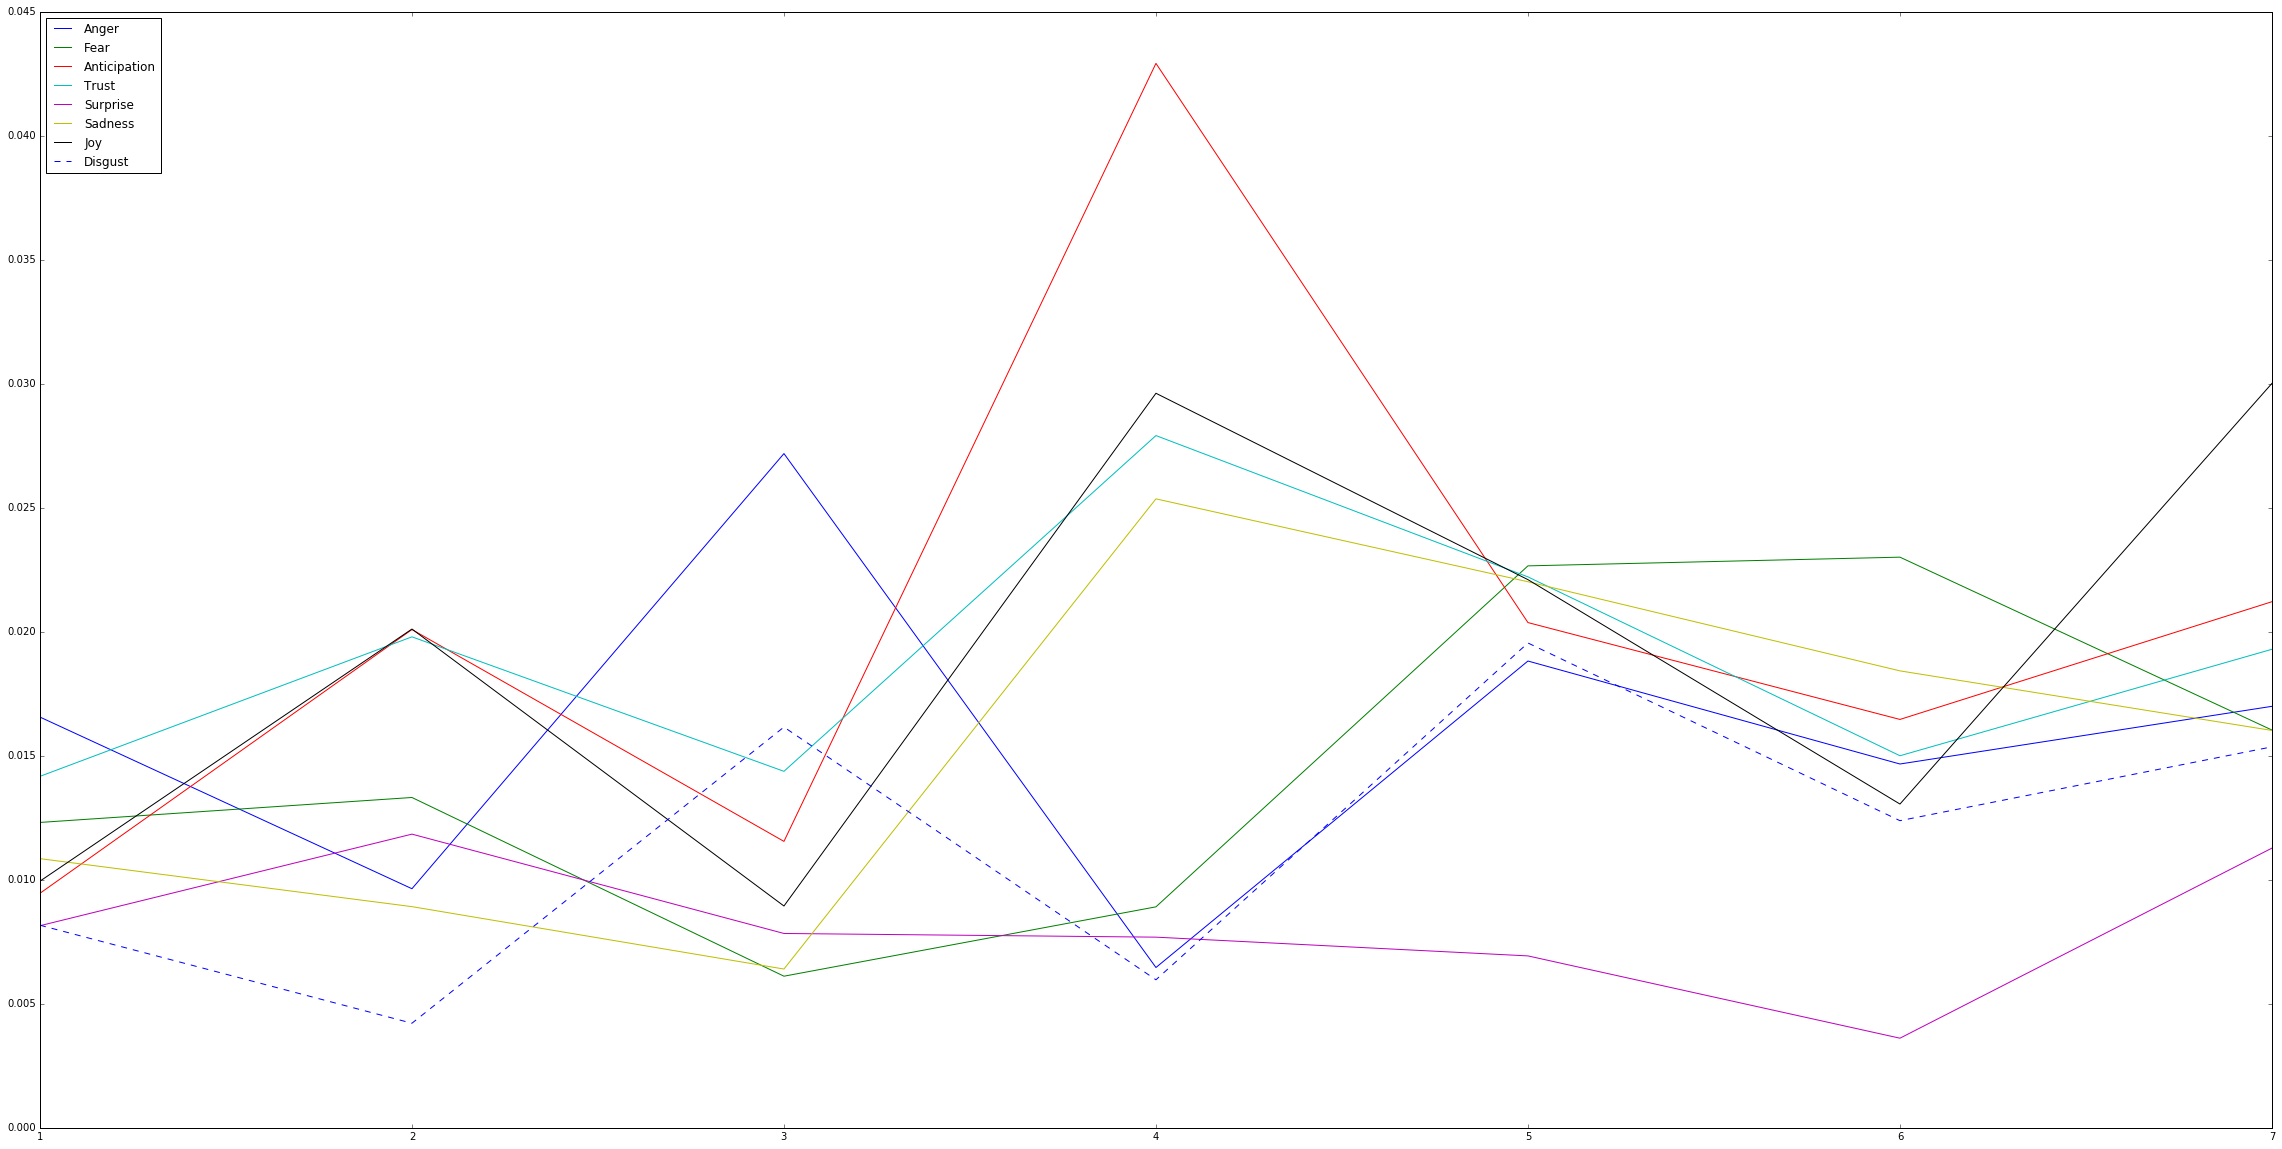

In [207]:
album_points = [x+1 for x in range(len(album_anger))]

plt.figure(figsize=(40,20))
plt.plot(album_points,album_anger)
plt.plot(album_points,album_fear)
plt.plot(album_points,album_anticipation)
plt.plot(album_points,album_trust)
plt.plot(album_points,album_surprise)
plt.plot(album_points,album_sadness)
plt.plot(album_points,album_joy)
plt.plot(album_points,album_disgust, 'b--')
plt.legend(['Anger', 'Fear', 'Anticipation', 
            'Trust', 'Surprise', 'Sadness', 
            'Joy', 'Disgust'], loc='upper left')